In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('Polynomial sample.txt')
data.head()

,SerialN0,Temperature,Pressure
0,1,0.0,0.0002
1,2,20.0,0.0012
2,3,40.0,0.0600
3,4,60.0,0.0300
4,5,80.0,0.0900


In [5]:
x=data.iloc[:,1:2].values
y=data.iloc[:,2].values
print(x)

[[  0.]
 [ 20.]
 [ 40.]
 [ 60.]
 [ 80.]
 [100.]]


In [6]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
pred=model.predict(x)
print(pred)

[-0.03800952  0.00728762  0.05258476  0.0978819   0.14317905  0.18847619]


Text(0.5, 1.0, 'Linear Regression')

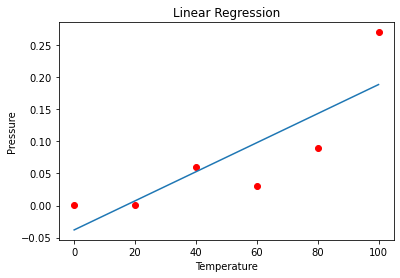

In [14]:
plt.scatter(x,y,color='red')
plt.plot(x,pred)
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Linear Regression')

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
print(x_poly)

[[1.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.00e+00 2.00e+01 4.00e+02 8.00e+03]
 [1.00e+00 4.00e+01 1.60e+03 6.40e+04]
 [1.00e+00 6.00e+01 3.60e+03 2.16e+05]
 [1.00e+00 8.00e+01 6.40e+03 5.12e+05]
 [1.00e+00 1.00e+02 1.00e+04 1.00e+06]]


In [9]:
lin=LinearRegression()
lin.fit(x_poly,y)
pred2=lin.predict(x_poly)
print(pred2)

[-0.00798889  0.02953016  0.02856825  0.03620317  0.0995127   0.2655746 ]


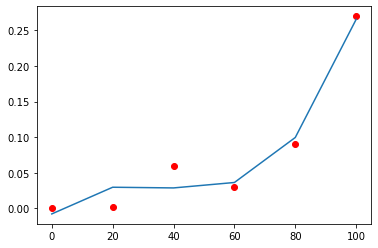

In [10]:
plt.scatter(x,y,color='Red')
plt.plot(x,pred2)

In [11]:
result=pd.DataFrame({'Actual Value':y,'predicted Value':pred,'Polynomial Value':pred2})
print(result)

   Actual Value  predicted Value  Polynomial Value
0        0.0002        -0.038010         -0.007989
1        0.0012         0.007288          0.029530
2        0.0600         0.052585          0.028568
3        0.0300         0.097882          0.036203
4        0.0900         0.143179          0.099513
5        0.2700         0.188476          0.265575


In [12]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
print('Simple Linear Regression',r2_score(y,pred))
print('Polynomial Regression',r2_score(y,pred2))
print('Mean of simple linear regression',mean_absolute_percentage_error(y,pred))
print('Mean of polynomial regression',mean_absolute_percentage_error(y,pred2))

Simple Linear Regression 0.6966674748357813
Polynomial Regression 0.9610764356813889
Mean of simple linear regression 33.23329512051735
Mean of polynomial regression 10.900938663526999
